In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 100
optimizer = Adam()
validation_split = 0.2
verbosity = 1

What do they mean is what you may wonder now. Let's find out:

The batch size is the amount of samples that will be fed forward in your model at once, after which the loss value is computed. You could either feed the model the entire training batch, one sample every time or a minibatch - and you can set this value by specifying batch_size.
The image width, image height and number of channels. Width and height are 32, respectively, and number of channels is 3, as the dataset contains RGB images.
The loss function used to compare predictions with ground truth during training. We use sparse categorical crossentropy loss. We skip the "why" for now - I'll show you later why we use sparse instead of regular categorical crossentropy loss.
The number of classes and number of epochs (or iterations), which we set to 10 and 100, respectively. We set the first to 10 because we have ten distinct classes - the digits 0 to 9. The second is set to 100 because I'm assuming that we'll have passed maximum model performance by then. We don't want to be training infinitely, as this induces overfitting.
The optimizer, or the method by which we update the weights of our neural network. We use Adam optimization - which is a relatively state-of-the-art optimizer and common in today's neural networks.
20% of our training data will be used for validation purposes; that is, used to test the model with non-training-data during training.
Verbosity mode is set to "1", which means "True", which means that all the output is displayed on screen. This is good for understanding what happens during training, but it's best to turn it off when you actually train models, as it slows down the training process.

In [3]:
# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

170508288/170498071 [==============================] - 7s 0us/step


The next step is to determine the shape of one sample. This is required by Keras to understand what data it can expect in the input layer of your neural network. You can do so as follows:

In [4]:
# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

Next, two technical things. Firstly, we'll convert our data into float32 format, which presumably speeds up training. Then, we normalize the data, into the [latex][-1, 1][/latex] range.

In [5]:
# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

We can then create the architecture of our model. First, we'll instantiate the Sequential API and assign it to model - this is like the foundation of your model, the Lego board onto which you can "click" bricks, a.k.a. layers.

Next, it's time to stack a few layers. Firstly, we'll use three convolutional blocks - which is the nickname I often use for convolutional layers with some related ones. In this case, the related layer that is applied every time is a MaxPooling2D one directly after the Conv2D layer. As you can see, each time, the numer of feature maps increases - from 32, to 64, to 128. This is done because the model then learns a limited number of "generic" patterns (32) and a high amount of patterns unique to the image (128). Max Pooling ensures translation invariance, as we discussed before.

After the convolutional blocks, we add a Flatten layer. The Dense layers, which are responsible for generating the actual classifications, only work with one-dimensional data. Flatten makes this happen: it converts the multidimensional feature maps into one-dimensional shape. Great!

As said, the Dense layers ensure that classification is possible. As you can see, in terms of the number of outputs per layer, we create an information bottleneck that eventually converges in no_classes - thus 10 - outputs, exactly the number of unique classes in our dataset. As we're using the Softmax activation function, we'll get a discrete multiclass probability distribution as our output for any input. From this distribution, we can draw the one with the highest value, which is the most likely class for our input

In [6]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

Compiling the model & fitting data
To be fair: no, it's not :) What we did so far was create the skeleton for our model. We don't have a model yet, as it must be compiled first. This can be done by calling model.compile. As you can see, it involves specifying settings for the training process, such as the loss function and the optimizer. What's more, and what I always prefer, is to add accuracy as an additional metric, due to it being intuitive for humans.

Once the model is compiled, we do have a model, but it's not yet trained. We can start the training process by calling model.fit, which fits our data (in this case our training data and the corresponding targets) and specifies some settings for our training process, ones that we configured before.

Here, it also becomes clear why we decided to use sparse categorical crossentropy instead of true categorical crossentropy. Categorical crossentropy requires our data to be categorical, which can e.g. be achieved with to_categorical i.e. one-hot encoding of your target vectors.

Our data is not categorical by nature: our targets are integers in the range [latex][0, 9][/latex]. But why convert them, I'd argue, if there is a loss function which does the same as true categorical crossentropy but works with integer targets? Indeed, sparse categorical crossentropy is this activation function. Hence, we choose it over the other one :)

In [7]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/100
800/800 [==============================] - 42s 52ms/step - loss: 1.6148 - accuracy: 0.4041 - val_loss: 1.3275 - val_accuracy: 0.5176
Epoch 2/100
800/800 [==============================] - 41s 51ms/step - loss: 1.2166 - accuracy: 0.5662 - val_loss: 1.1340 - val_accuracy: 0.6061
Epoch 3/100
800/800 [==============================] - 41s 51ms/step - loss: 1.0589 - accuracy: 0.6252 - val_loss: 1.0721 - val_accuracy: 0.6306
Epoch 4/100
800/800 [==============================] - 41s 52ms/step - loss: 0.9460 - accuracy: 0.6650 - val_loss: 0.9676 - val_accuracy: 0.6624
Epoch 5/100
800/800 [==============================] - 41s 51ms/step - loss: 0.8569 - accuracy: 0.6973 - val_loss: 0.9385 - val_accuracy: 0.6754
Epoch 6/100
800/800 [==============================] - 41s 51ms/step - loss: 0.7731 - accuracy: 0.7261 - val_loss: 0.9465 - val_accuracy: 0.6775
Epoch 7/100
800/800 [==============================] - 41s 51ms/step - loss: 0.7129 - accuracy: 0.7512 - val_loss: 0.9210 - val_ac

Test loss: 3.4624922275543213 / Test accuracy: 0.6851999759674072


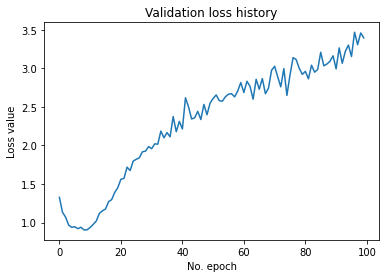

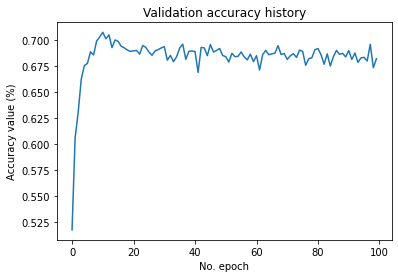

In [8]:
# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()